In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("data.csv")

In [15]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 1460
Columns: 81


In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [89]:
# Drop columns with more than 80% missing
missing = df.isnull().sum() / len(df)
drop_cols = missing[missing > 0.8].index
df = df.drop(columns=drop_cols)
print("Dropped columns:", list(drop_cols))

Dropped columns: []


In [91]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [93]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [95]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

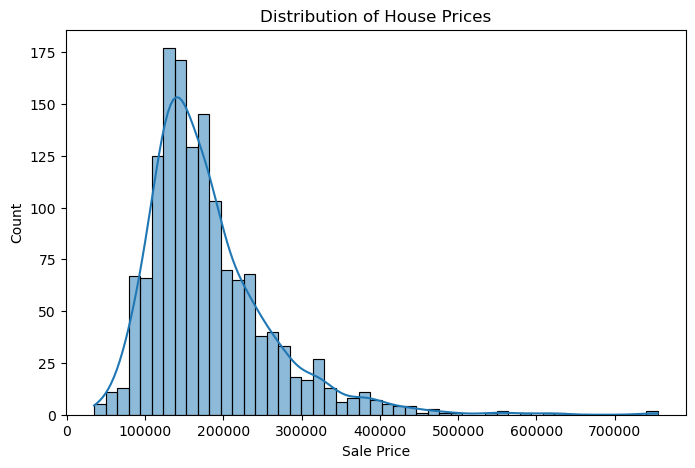

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()

In [41]:
# Get correlation matrix
correlation = df.corr(numeric_only=True)
top_corr = correlation['SalePrice'].sort_values(ascending=False).head(10)
print(top_corr)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


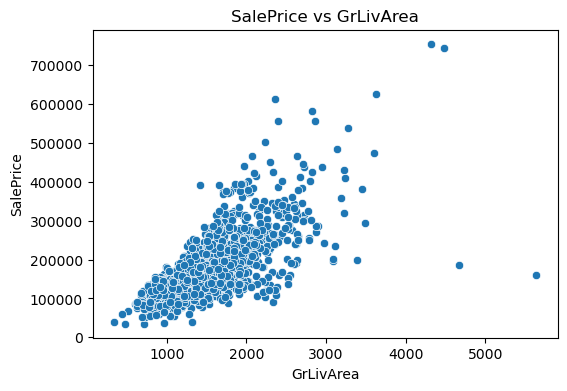

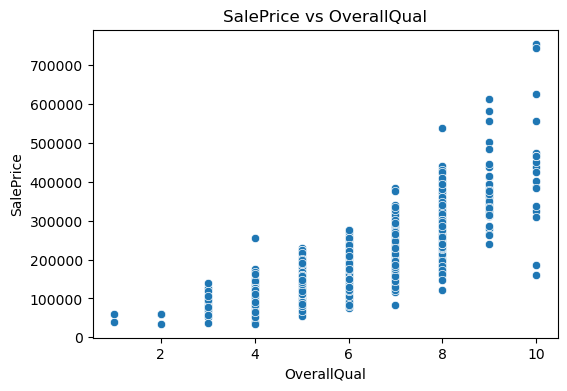

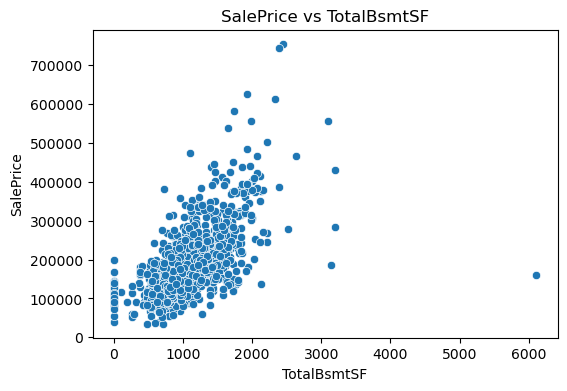

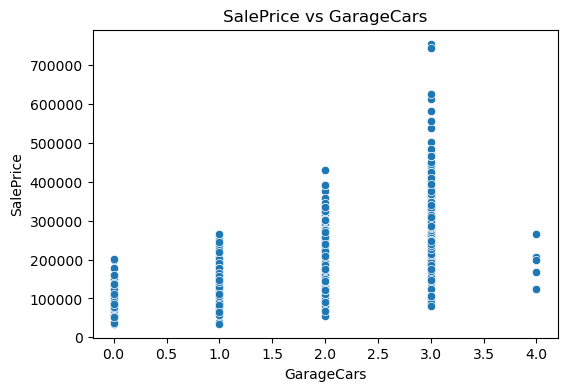

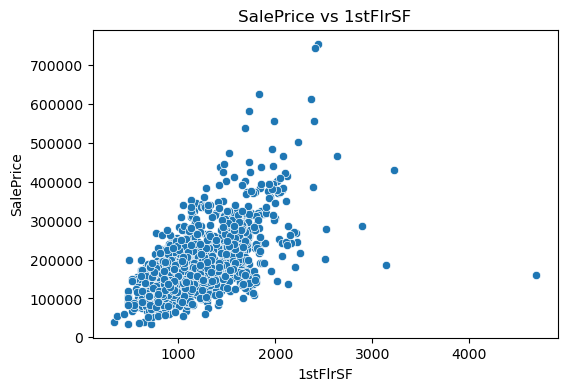

In [43]:
top_features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', '1stFlrSF']

for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f"SalePrice vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()

In [52]:
df_encoded = pd.get_dummies(df, drop_first=True)
print("New shape after encoding:", df_encoded.shape)

New shape after encoding: (1460, 237)


In [54]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1168, 236)
Test size: (292, 236)


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [66]:
def evaluate_model(name, y_true, y_pred):
    print(f"----- {name} -----")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))
    print("\n")

In [72]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
evaluate_model("Linear Regression", y_test, lr_preds)

----- Linear Regression -----
MAE : 184101747778.1335
RMSE: 3145917444509.353
R² Score: -1290270622179655.5




In [75]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # no scaling needed
rf_preds = rf.predict(X_test)
evaluate_model("Random Forest", y_test, rf_preds)

----- Random Forest -----
MAE : 17607.80941780822
RMSE: 28586.145166019658
R² Score: 0.893463762377269




In [77]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
evaluate_model("XGBoost", y_test, xgb_preds)

----- XGBoost -----
MAE : 16793.226616010274
RMSE: 26602.33826909386
R² Score: 0.9077373743057251




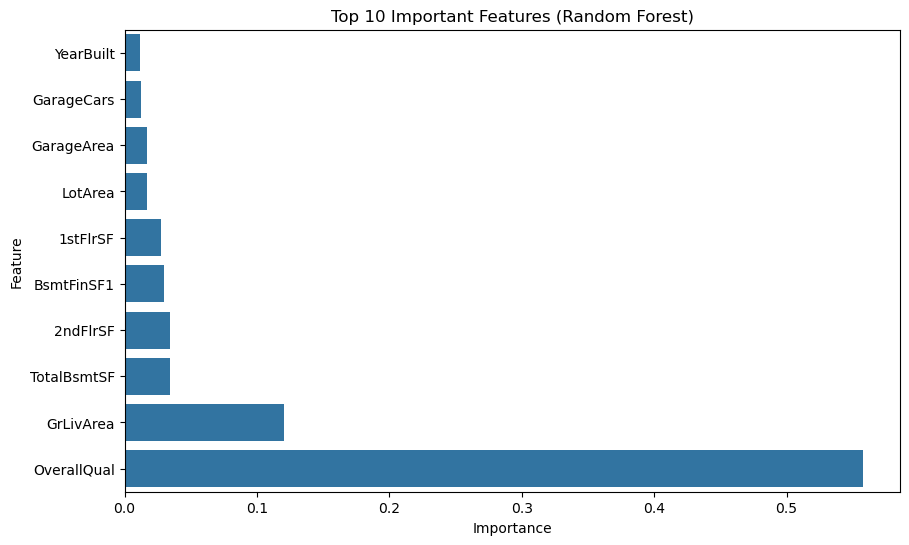

In [81]:
# Get feature importances
importances = rf.feature_importances_
features = X.columns
# Sort them
sorted_idx = importances.argsort()[-10:]  # Top 10
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

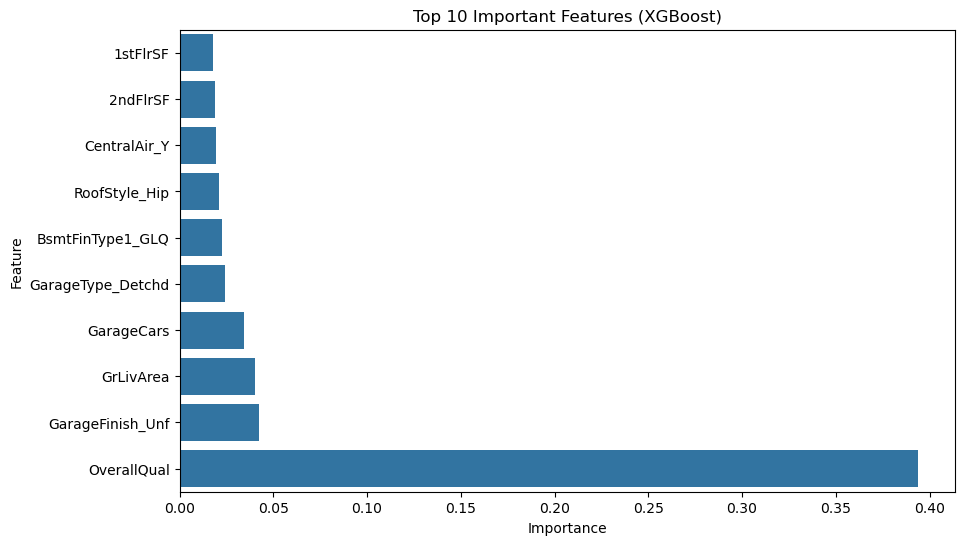

In [83]:
xgb_importances = xgb.feature_importances_
sorted_idx = xgb_importances.argsort()[-10:]
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_importances[sorted_idx], y=features[sorted_idx])
plt.title("Top 10 Important Features (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [85]:
# Group by neighborhood and calculate average price
neighborhood_price = df.groupby('Neighborhood')['SalePrice'].mean().sort_values()
# Show cheapest top 5
print("Top 5 Most Affordable Neighborhoods:")
print(neighborhood_price.head(5))
# Show most expensive top 5
print("\nTop 5 Most Expensive Neighborhoods:")
print(neighborhood_price.tail(5))

Top 5 Most Affordable Neighborhoods:
Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
Name: SalePrice, dtype: float64

Top 5 Most Expensive Neighborhoods:
Neighborhood
Veenker    238772.727273
Timber     242247.447368
StoneBr    310499.000000
NridgHt    316270.623377
NoRidge    335295.317073
Name: SalePrice, dtype: float64


In [87]:
# Homes under 200000 with 3+ bedrooms
recommendations = df[(df['SalePrice'] < 200000) & (df['BedroomAbvGr'] >= 3)]
recommendations[['Neighborhood', 'SalePrice', 'GrLivArea', 'GarageCars']].head(10)

,Neighborhood,SalePrice,GrLivArea,GarageCars
1,Veenker,181500,1262,2
3,Crawfor,140000,1717,3
10,Sawyer,129500,1040,1
18,SawyerW,159000,1114,2
19,NAmes,139000,1339,1
21,IDOTRR,139400,1108,1
23,MeadowV,129900,1060,2
24,Sawyer,154000,1060,1
26,NAmes,134800,900,2
30,IDOTRR,40000,1317,1


***MODEL COMPARISON REPORT***

***REPORT ON CHALLENGES FACED***

**1. Missing Values**

**2. Categorical Data**

**3. Data Skewness & Outliers**

**4. Model Performance & Overfitting**

-->Linear Regression underperformed on complex features.

Solution: Used tree-based models (Random Forest & XGBoost) that handle non-linearity and feature interactions better.

**5. High Dimensionality after Encoding**